In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
import os

In [3]:
DATASET_DIR = "pca_dataset"
IMG_SIZE = 75, 100

In [10]:
def convert_image_to_vector(image):
    return np.ravel(image)

def convert_vector_to_image(vector):
    return vector.reshape(IMG_SIZE[1], IMG_SIZE[0])

In [149]:
def load_images():
    vectors = []
    labels = []
    for _, _, files in os.walk(DATASET_DIR):
        for file in files:
            label, rotation_angle = file.split("_")[:2]

            image = Image.\
                open(os.path.join(DATASET_DIR, file)).\
                convert("L").\
                rotate(int(rotation_angle), expand=True).\
                resize(IMG_SIZE)

            vectors.append(convert_image_to_vector(image))
            labels.append(label)
    return vectors, labels

vectors, labels = load_images()

In [136]:
def single_plot(item, title = None):
    plt.axis("off")
    plt.title(title)
    plt.imshow(convert_vector_to_image(item), cmap='gray')


def batch_plot(items, titles, save_name = None):
    fig = plt.figure(figsize=(15, 21))
    col_count = 7
    row_count = 7
    for i in range(len(items)):
        fig.add_subplot(row_count, col_count, i + 1)
        single_plot(items[i], titles[i])
    plt.savefig(save_name, bbox_inches='tight')
    plt.show()

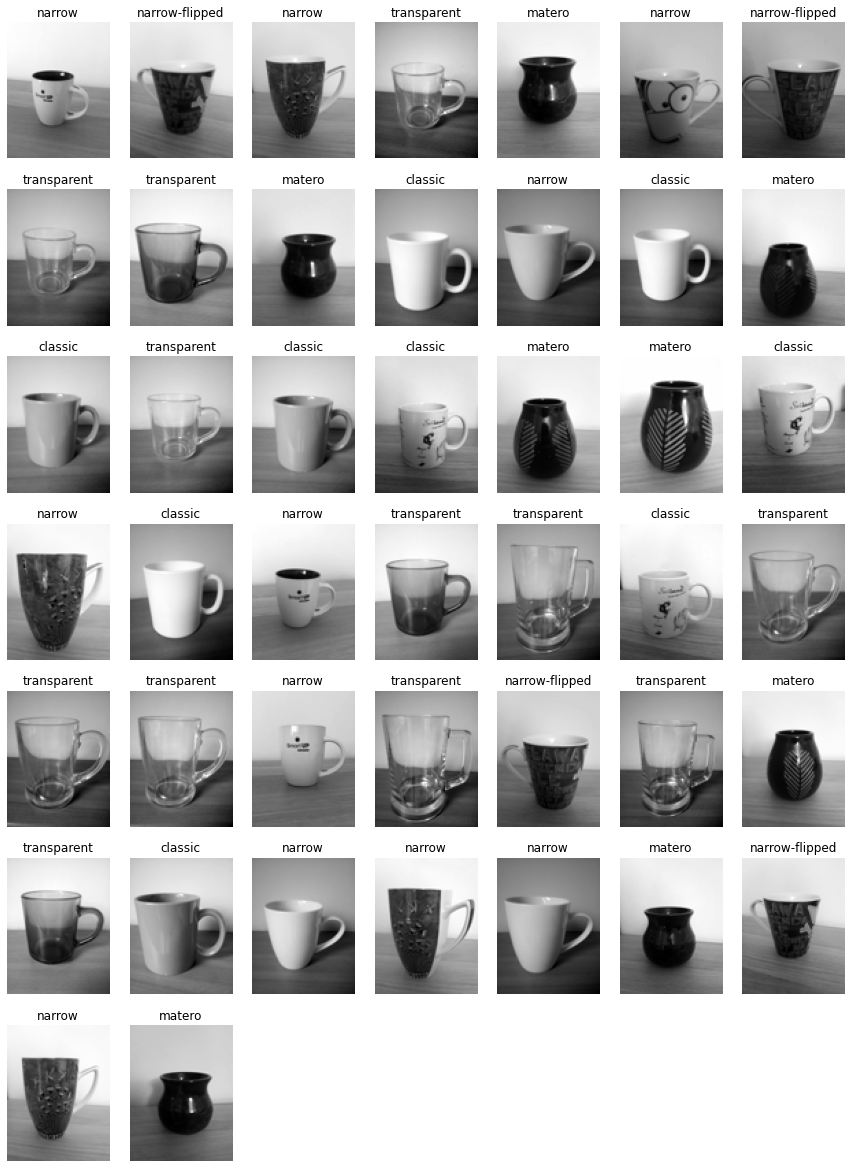

In [137]:
batch_plot(vectors, labels, "processed_dataset")

In [111]:
pca = PCA()
pca.fit(vectors)

PCA()

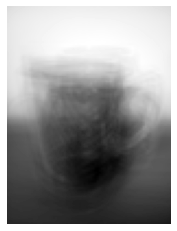

In [138]:
single_plot(pca.mean_)
plt.savefig("mean")
plt.show()

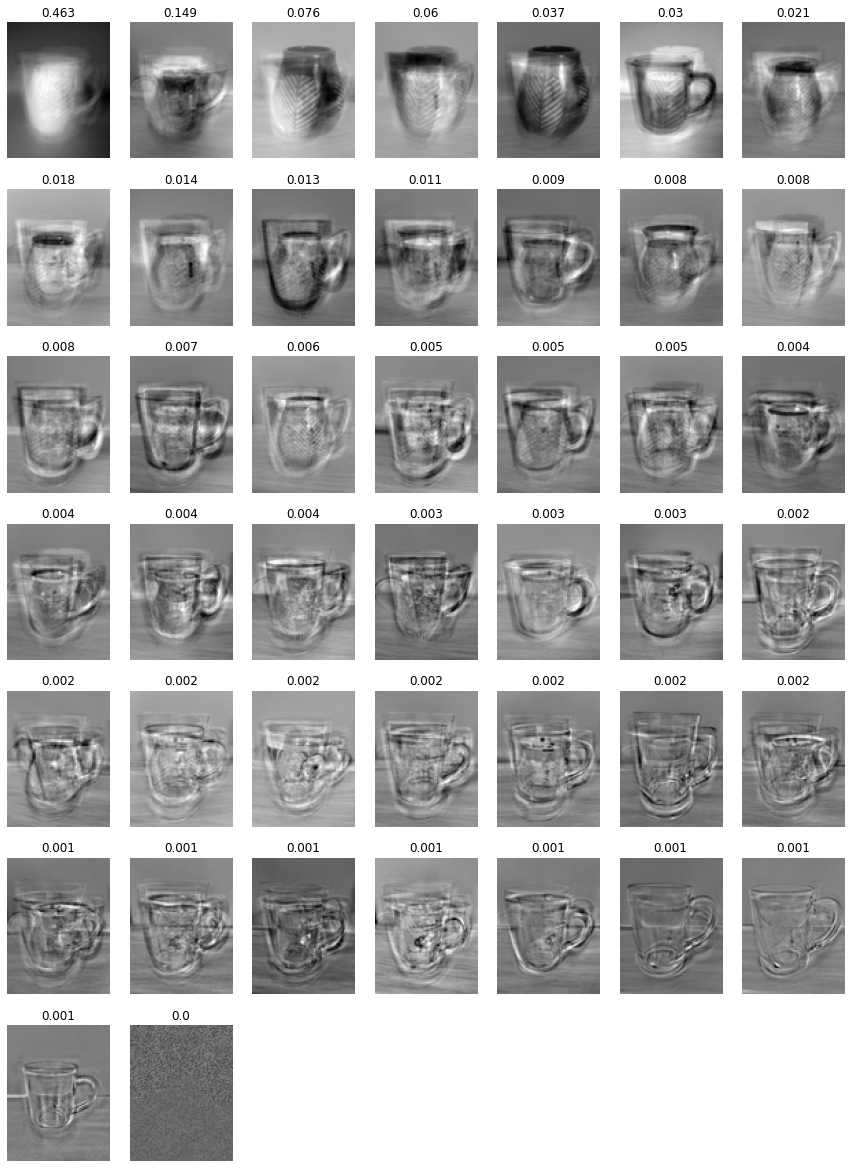

In [139]:
variances = [round(variance, 3) for variance in pca.explained_variance_ratio_]
batch_plot(pca.components_, variances, "components")

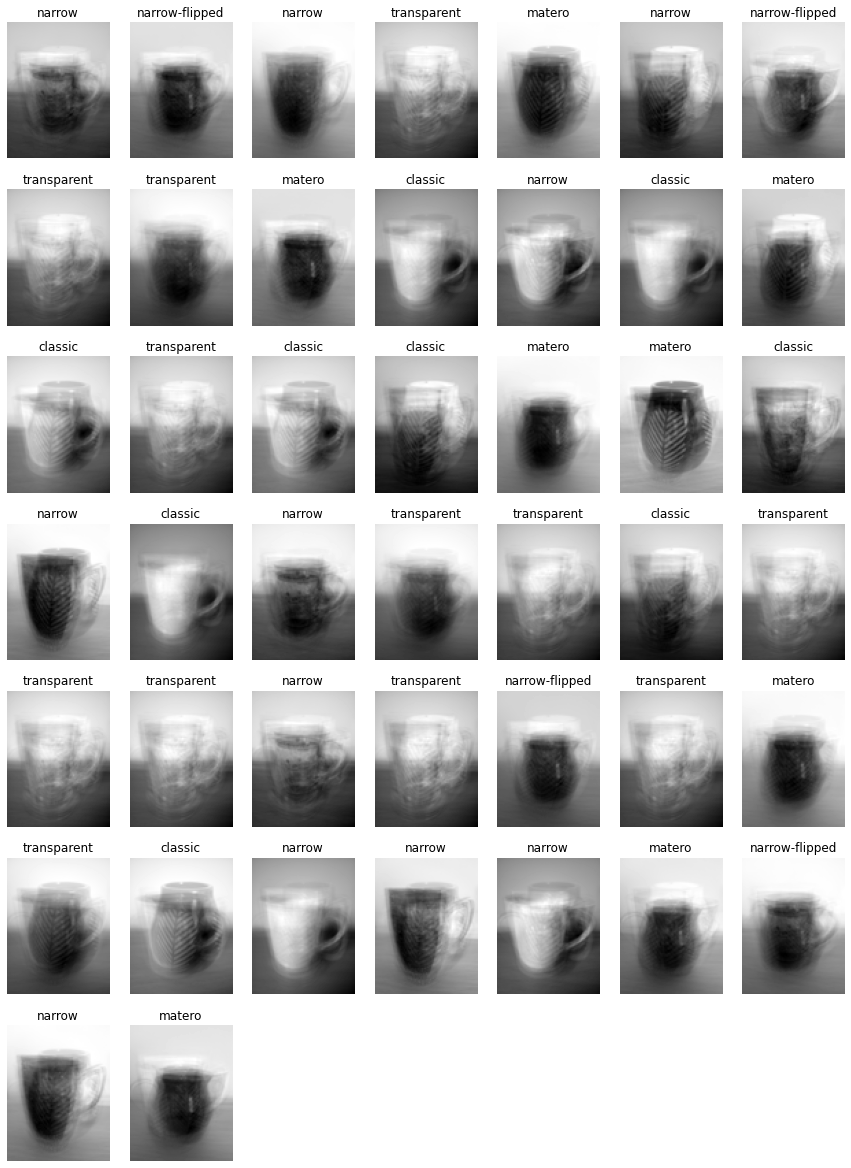

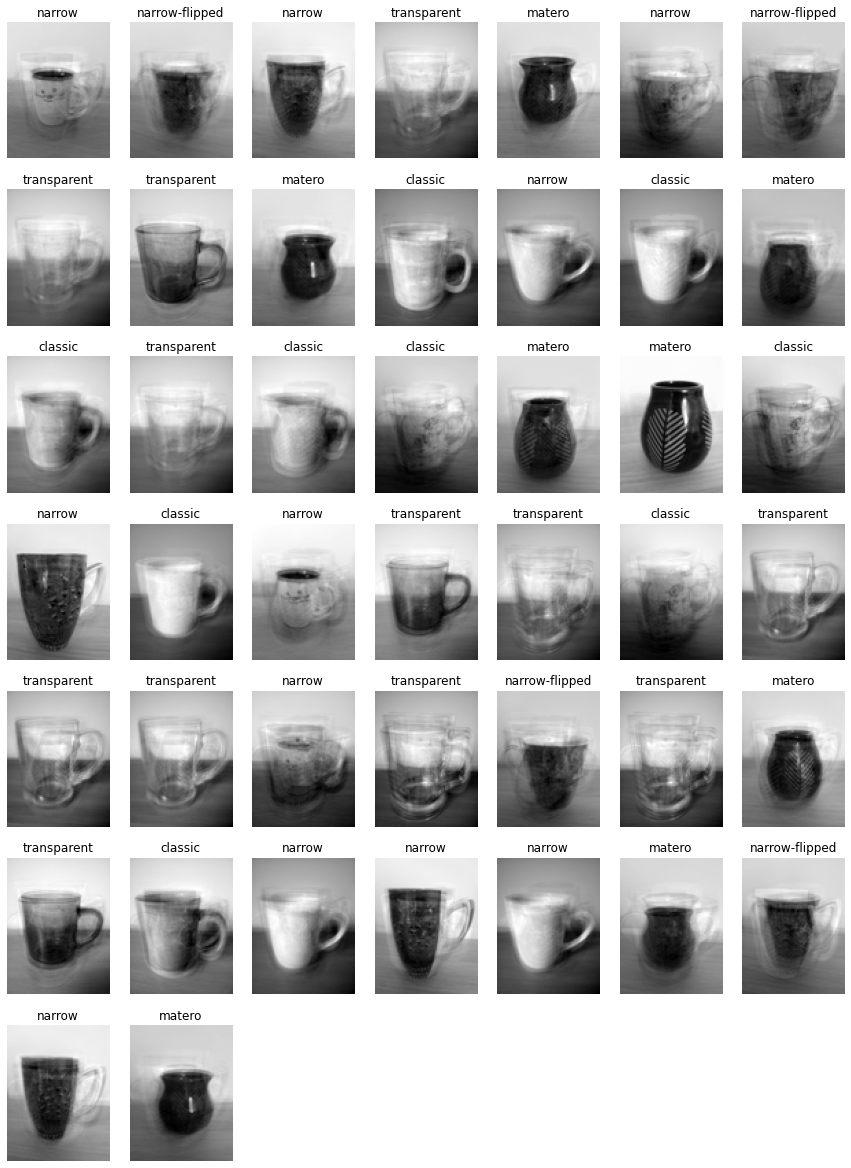

In [141]:
for n in [4, 16]:
    pca = PCA(n_components=n)
    pca.fit(vectors)
    transformed_vectors = pca.inverse_transform(pca.transform(vectors))
    batch_plot(transformed_vectors, labels, "components" + str(n))

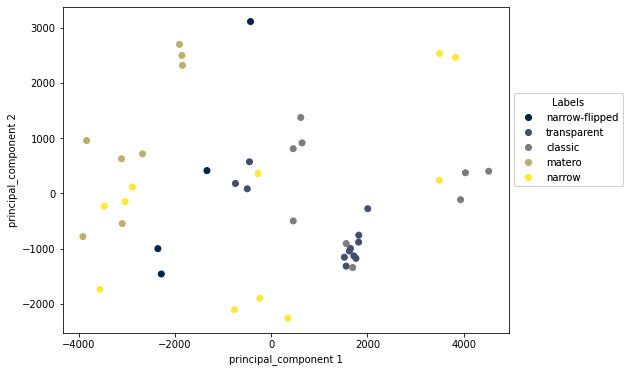

In [148]:
unique_labels = list(set(labels))
labels_indices = [unique_labels.index(label) for label in labels]

pca = PCA(n_components=2)
pca.fit(vectors)
transformed_vectors = pca.transform(vectors)

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sc = ax.scatter(transformed_vectors[:,0], transformed_vectors[:, 1], c=labels_indices, cmap=plt.cm.cividis)
legend = ax.legend(sc.legend_elements(num=len(unique_labels) - 1)[0], unique_labels, loc="best", title="Labels", bbox_to_anchor=(1, 0.75), ncol=1)
ax.add_artist(legend)
ax.set_xlabel("principal_component 1")
ax.set_ylabel("principal_component 2")
plt.savefig("points", bbox_inches='tight')
plt.show()